# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group in batches of 59 since free OpenWeather API limit is 60 calls per minute
    if (i % 59 == 0 and i >= 59):
        print("Waiting for API rate limit to reset (60 seconds)")
        time.sleep(60)
        
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {i} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        weather_response = requests.get(city_url)

        # if status code is not 200, the request failed
        if weather_response.status_code != 200:
            print(f"  City not found. Skipping... {city}")
            continue

        # Parse the JSON and retrieve data
        c_w_json = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": c_w_json["coord"]["lat"], 
                          "Lng": c_w_json["coord"]["lon"], 
                          "Max Temp": c_w_json["main"]["temp_max"],
                          "Humidity": c_w_json["main"]["humidity"],
                          "Cloudiness": c_w_json["clouds"]["all"],
                          "Wind Speed": c_w_json["wind"]["speed"],
                          "Country": c_w_json["sys"]["country"],
                          "Date": c_w_json["dt"]})
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"  City not found. Skipping... {city}", e)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 29 of Set 2 | 88 | klaksvik
Processing Record 30 of Set 2 | 89 | guerrero negro
Processing Record 31 of Set 2 | 90 | bereda
Processing Record 32 of Set 2 | 91 | narsaq
Processing Record 33 of Set 2 | 92 | saint-augustin
Processing Record 34 of Set 2 | 93 | thompson
Processing Record 35 of Set 2 | 94 | iqaluit
Processing Record 36 of Set 2 | 95 | avarua
Processing Record 37 of Set 2 | 96 | cape town
Processing Record 38 of Set 2 | 97 | kushmurun
Processing Record 39 of Set 2 | 98 | hermanus
Processing Record 40 of Set 2 | 99 | atasu
Processing Record 41 of Set 2 | 100 | iskateley
Processing Record 42 of Set 2 | 101 | merauke
Processing Record 43 of Set 2 | 102 | tsaratanana
Processing Record 44 of Set 2 | 103 | matara
Processing Record 45 of Set 2 | 104 | san javier
Processing Record 46 of Set 2 | 105 | port elizabeth
Processing Record 47 of Set 2 | 106 | umiray
Processing Record 48 of Set 2 | 107 | nioro
Processing Record 49 of Set 2 | 108 | hobart
Processing Record 5

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,baiyin,36.5583,104.2081,19.18,44,50,0.24,CN,1687109291
1,ushuaia,-54.8000,-68.3000,1.81,87,40,8.23,AR,1687109292
2,busselton,-33.6500,115.3333,8.85,81,22,2.66,AU,1687109292
3,georgetown,5.4112,100.3354,27.96,77,20,1.03,MY,1687109260
4,souillac,-20.5167,57.5167,22.21,60,40,2.06,MU,1687109292


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,baiyin,36.5583,104.2081,19.18,44,50,0.24,CN,1687109291
1,ushuaia,-54.8000,-68.3000,1.81,87,40,8.23,AR,1687109292
2,busselton,-33.6500,115.3333,8.85,81,22,2.66,AU,1687109292
3,georgetown,5.4112,100.3354,27.96,77,20,1.03,MY,1687109260
4,souillac,-20.5167,57.5167,22.21,60,40,2.06,MU,1687109292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [12]:
# create custom gradient maps for two of the plots
from typing import Optional, Tuple, Union
from matplotlib.colors import LinearSegmentedColormap

# see docs for details:
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html#matplotlib.colors.LinearSegmentedColormap.from_list
humidity_colors = [(0, "#996121"),
                   (0.20, "#A08A5D"),
                   (0.35, "#FFDF89"),
                   (0.55, "#e7ff5e"),
                   (1, "#027C00")]
humidity_cmap = LinearSegmentedColormap.from_list("humidity", humidity_colors)
cloudiness_colors = [(0, "#4da2ff"),
                     (0.30, "#c5d1de"),
                     (1, "#f9f9f9")]
cloudiness_cmap = LinearSegmentedColormap.from_list("cloudiness", cloudiness_colors)

In [14]:
# all 4 charts below are so similar, so I created a function to make them.
def plot_scatter(fig: plt.Figure, axes: plt.Axes, x, y,
                 cmap: Union[str, LinearSegmentedColormap], cmap_min: float, cmap_max: float,
                 x_title: str, y_title: str, title: str,
                 xlim: Optional[Tuple[float, float]] = None, ylim: Optional[Tuple[float, float]] = None,
                 show_colorbar: bool = True) -> plt.Axes:
    """Creates a scatter plot with the given data with a colormap that varies with y.

    :param fig: matplotlib figure
    :param axes: matplotlib axes for a single plot
    :param x: x data
    :param y: y data
    :param cmap: string or LinearSegmentedColormap
    :param cmap_min: smallest cmap value
    :param cmap_max: largest cmap value
    :param x_title: X-Axis Label
    :param y_title: Y_Axis Label
    :param title: Plot Title
    :param xlim: x-axis limits, defaults to None
    :param ylim: y-axis limits, defaults to None
    :param show_colorbar: True to show the colorbar next to the plot, defaults to True
    :return: matplotlib axes
    """
    
    sc = axes.scatter(x, y, s=60, edgecolors='k', c=y, cmap=cmap, vmin=cmap_min, vmax=cmap_max)
    axes.set_title(title, fontsize=16)
    axes.set_xlabel(x_title, fontsize = 14)
    axes.set_ylabel(y_title, fontsize = 14)
    if xlim:
        axes.set_xlim(xlim[0], xlim[1])
    if ylim:
        axes.set_ylim(ylim[0], ylim[1])
    axes.set_axisbelow(True)
    axes.grid(alpha=0.75)
    if show_colorbar:
        fig.colorbar(sc, ax=axes)
    return axes

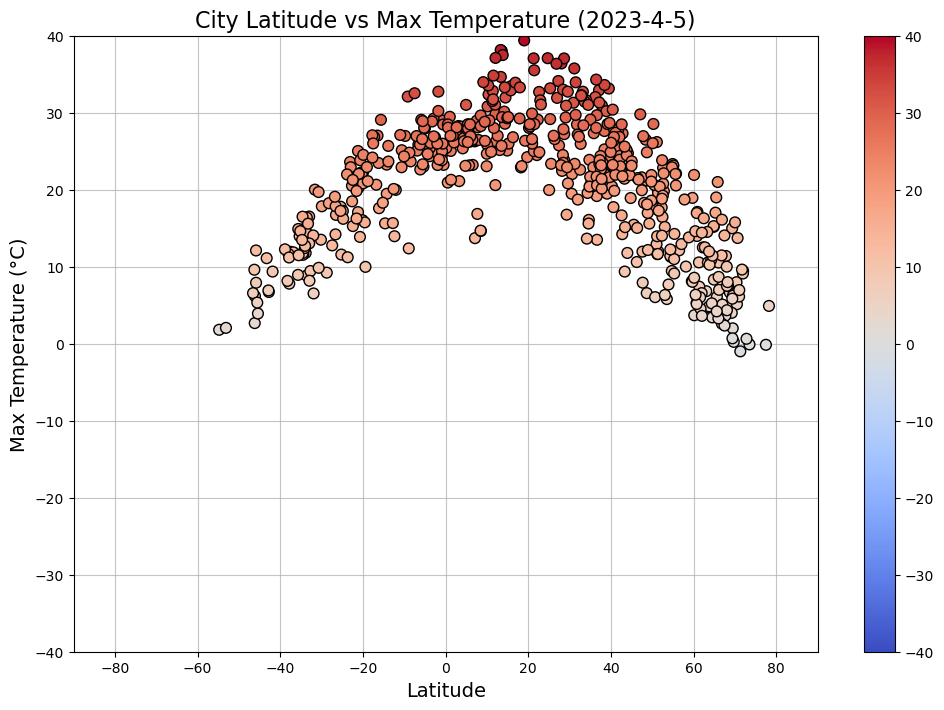

<Figure size 640x480 with 0 Axes>

In [17]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, city_data_df["Lat"], city_data_df["Max Temp"],
                  "coolwarm", -40, 40,
                  "Latitude", "Max Temperature (°C)", "City Latitude vs Max Temperature (2023-4-5)",
                  (-90, 90), (-40, 40))

# plt.savefig("output_data/WeatherPy_Lat_v_Temp.png")
plt.show()
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

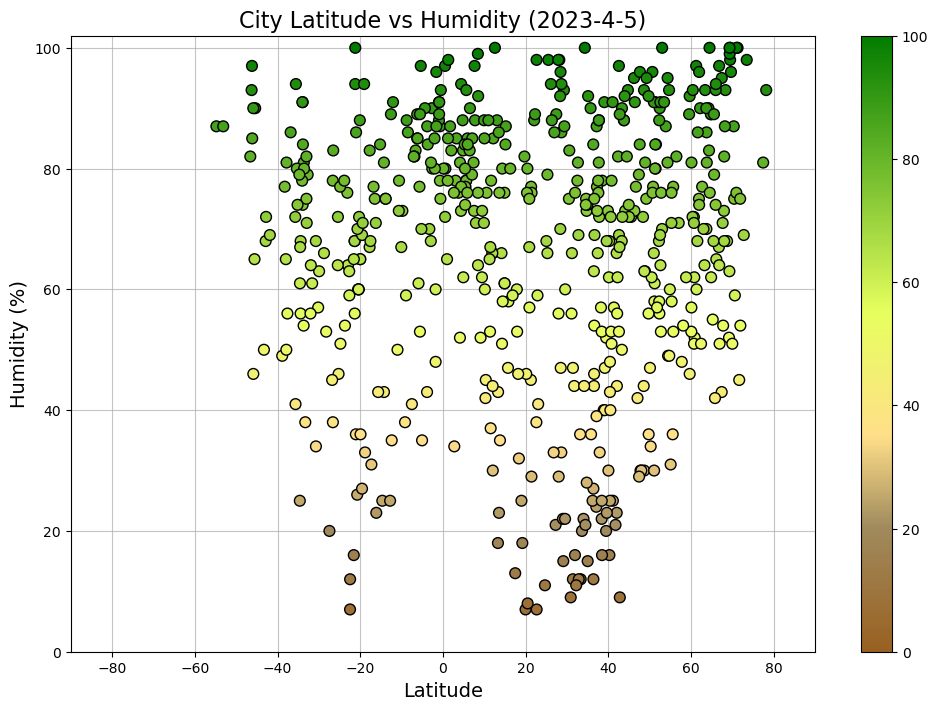

<Figure size 640x480 with 0 Axes>

In [23]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, city_data_df["Lat"], city_data_df["Humidity"],
                  humidity_cmap, 0, 100,
                  "Latitude", "Humidity (%)", "City Latitude vs Humidity (2023-4-5)",
                  (-90, 90), (0, 102))

# plt.savefig("output_data/WeatherPy_Lat_v_Humidity.png")
plt.show()

plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

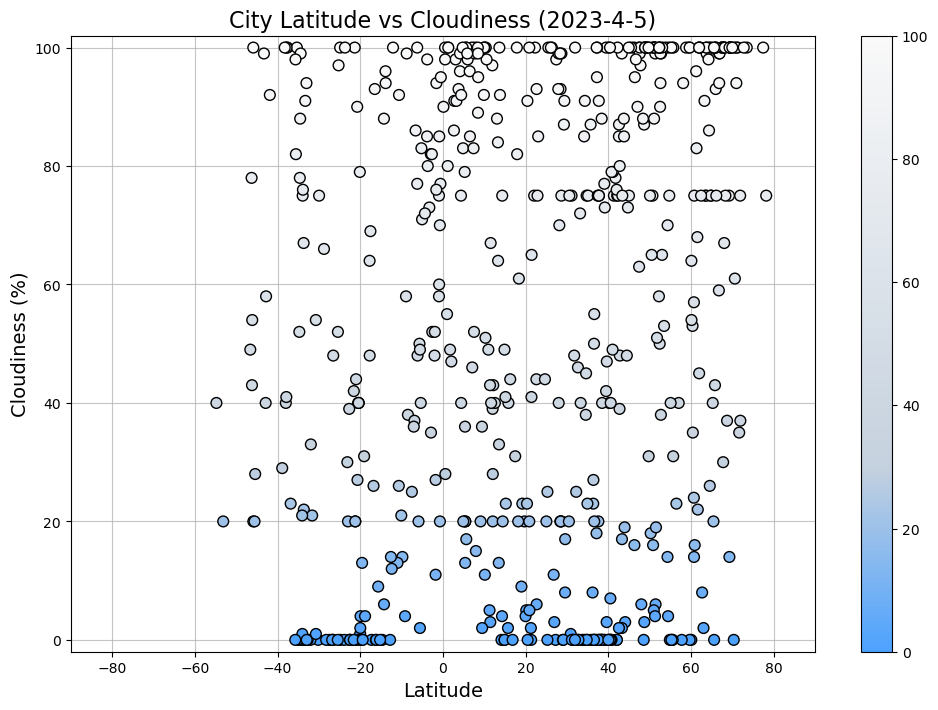

In [25]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, city_data_df["Lat"], city_data_df["Cloudiness"],
                  cloudiness_cmap, 0, 100,
                  "Latitude", "Cloudiness (%)", "City Latitude vs Cloudiness (2023-4-5)",
                  (-90, 90), (-2, 102))

# plt.savefig("output_data/WeatherPy_Lat_v_Cloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

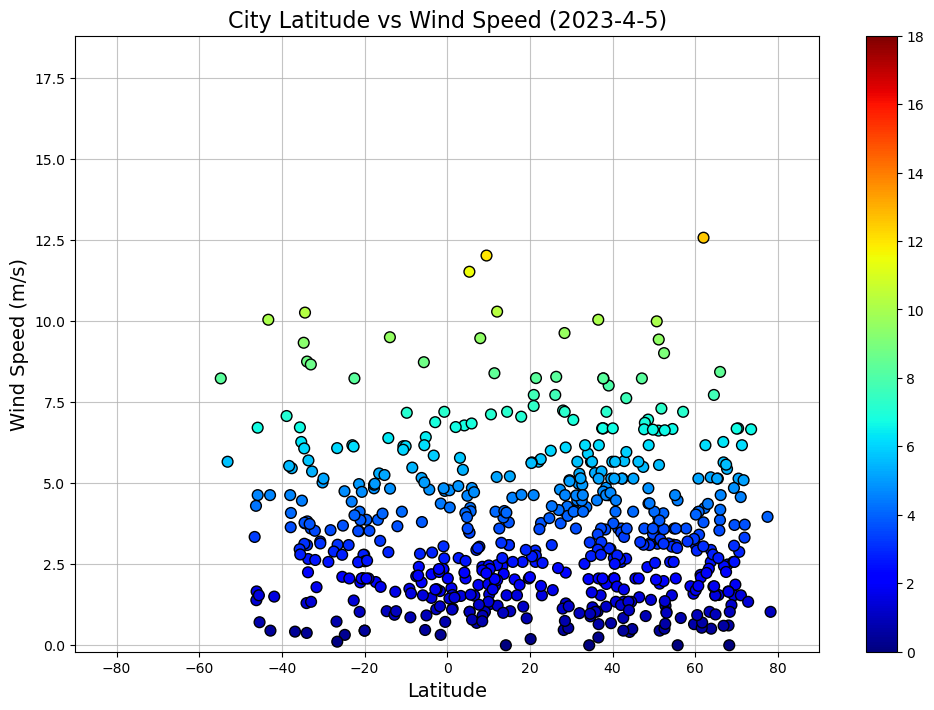

<Figure size 640x480 with 0 Axes>

In [27]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, city_data_df["Lat"], city_data_df["Wind Speed"],
                  "jet", 0, 18,
                  "Latitude", "Wind Speed (m/s)", "City Latitude vs Wind Speed (2023-4-5)",
                  (-90, 90), (-0.2, 18.8))

# plt.savefig("output_data/WeatherPy_Lat_v_Wind.png")
plt.show()
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,baiyin,36.5583,104.2081,19.18,44,50,0.24,CN,1687109291
3,georgetown,5.4112,100.3354,27.96,77,20,1.03,MY,1687109260
6,bethel,41.3712,-73.4140,25.50,57,75,3.60,US,1687109292
7,progreso,21.2833,-89.6667,37.06,45,2,2.92,MX,1687109293
8,palmer,42.1584,-72.3287,24.40,56,75,3.60,US,1687109293


In [50]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,1.81,87,40,8.23,AR,1687109292
2,busselton,-33.6500,115.3333,8.85,81,22,2.66,AU,1687109292
4,souillac,-20.5167,57.5167,22.21,60,40,2.06,MU,1687109292
5,rikitea,-23.1203,-134.9692,23.60,76,30,4.43,PF,1687109292
9,atuona,-9.8000,-139.0333,26.98,73,14,7.17,PF,1687109293


###  Temperature vs. Latitude Linear Regression Plot

In [51]:
def plot_linear_regression(ax: plt.Axes, x, y, line_color: str) -> plt.Axes:
    """Function to plot the linear regression line.
    A legend with the equation and r-value is also added.

    :param ax: plot axes to include line on
    :param x: x points array
    :param y: y points array
    :param line_color: color of line string
    :return: plot axes
    """
    l_regress = linregress(x, y)
    equation = f"y = {l_regress.slope:.2f}x + {l_regress.intercept:.2f}\nR = {l_regress.rvalue:.4f}"
    print(f"r-value = {l_regress.rvalue:.4f}")

    ls = np.linspace(x.min(), x.max(), 50)
    ax.plot(ls, (l_regress.slope * ls) + l_regress.intercept, label=equation, c=line_color, linewidth=4)
    ax.legend(fontsize=14)
    return ax

r-value = -0.7444


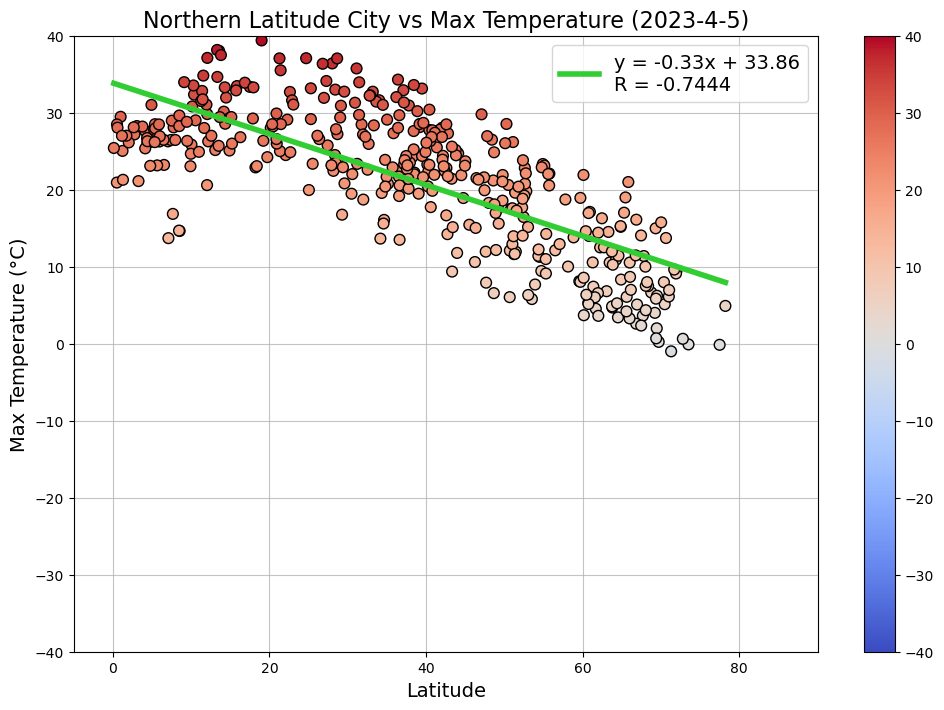

In [52]:
# Linear regression on Northern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                  "coolwarm", -40, 40,
                  "Latitude", "Max Temperature (°C)", "Northern Latitude City vs Max Temperature (2023-4-5)",
                  (-5, 90), (-40, 40))
ax = plot_linear_regression(ax, northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'limegreen')
plt.show()

r-value = 0.8674


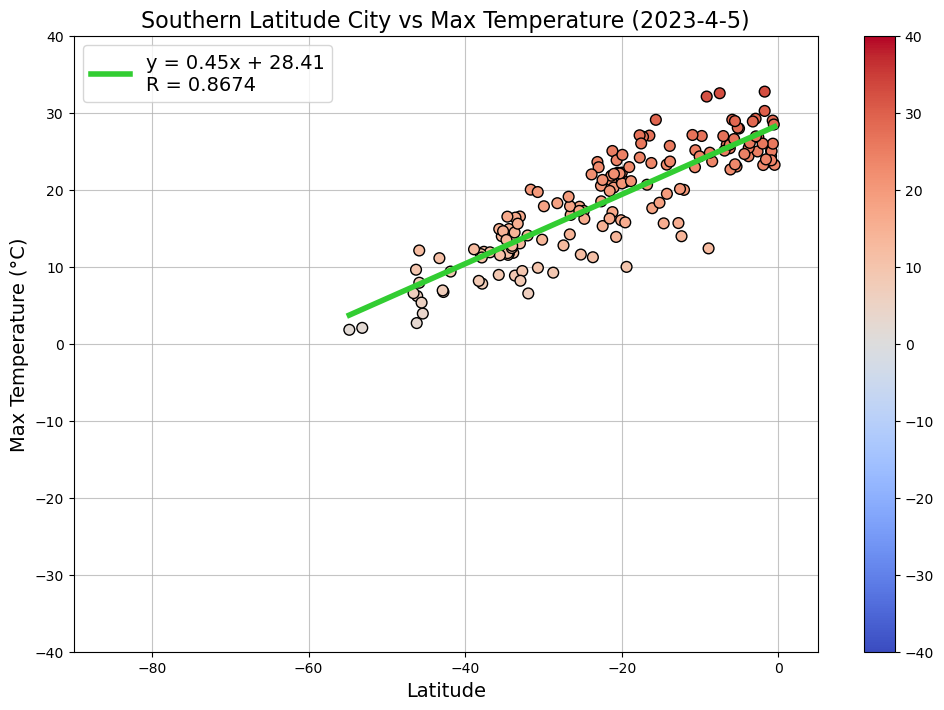

In [60]:
# Linear regression on Southern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                  "coolwarm", -40, 40,
                  "Latitude", "Max Temperature (°C)", "Southern Latitude City vs Max Temperature (2023-4-5)",
                  (-90, 5), (-40, 40))
ax = plot_linear_regression(ax, southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'limegreen')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.0820


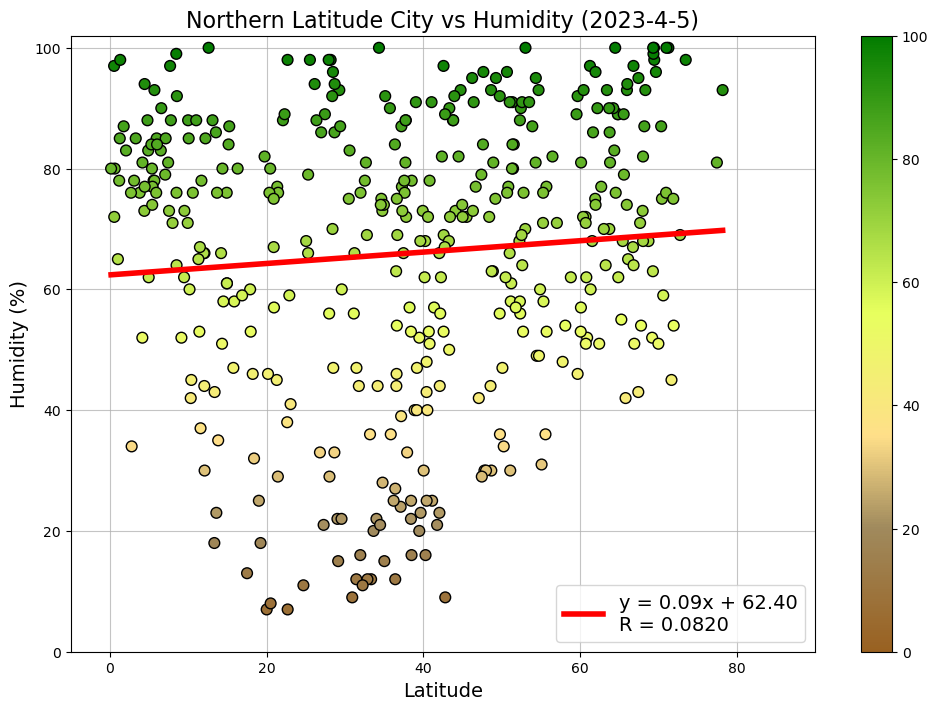

In [67]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                  humidity_cmap, 0, 100,
                  "Latitude", "Humidity (%)", "Northern Latitude City vs Humidity (2023-4-5)",
                  (-5, 90), (0, 102))
ax = plot_linear_regression(ax, northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'red')
plt.show()

r-value = 0.0708


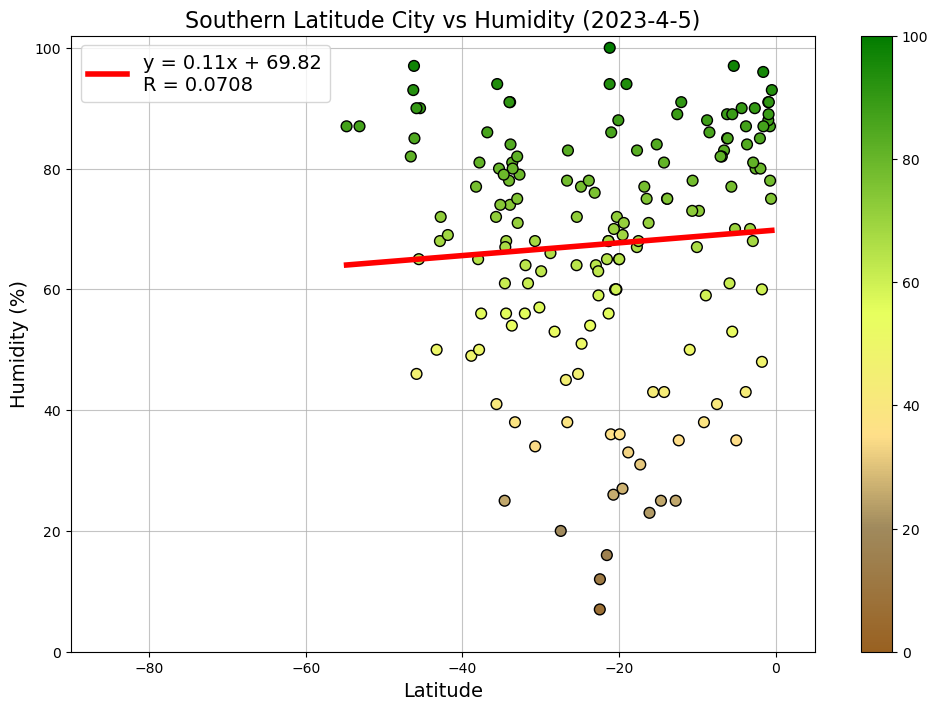

In [73]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                  humidity_cmap, 0, 100,
                  "Latitude", "Humidity (%)", "Southern Latitude City vs Humidity (2023-4-5)",
                  (-90, 5), (0, 102))
ax = plot_linear_regression(ax, southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.1176


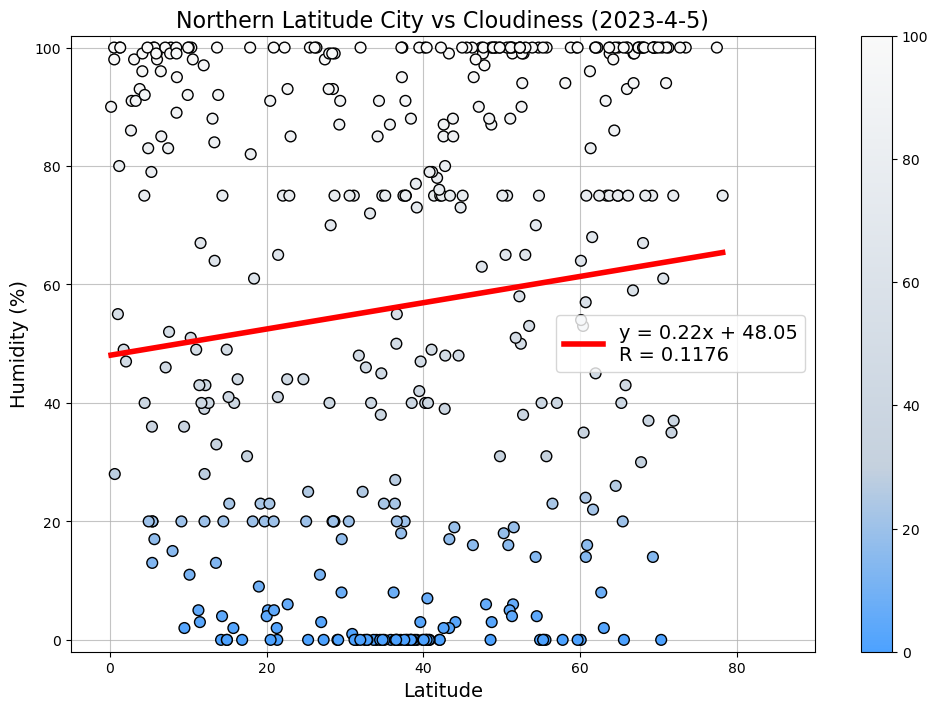

In [78]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                  cloudiness_cmap, 0, 100,
                  "Latitude", "Humidity (%)", "Northern Latitude City vs Cloudiness (2023-4-5)",
                  (-5, 90), (-2, 102))
ax = plot_linear_regression(ax, northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'red')
plt.show()

r-value = 0.0948


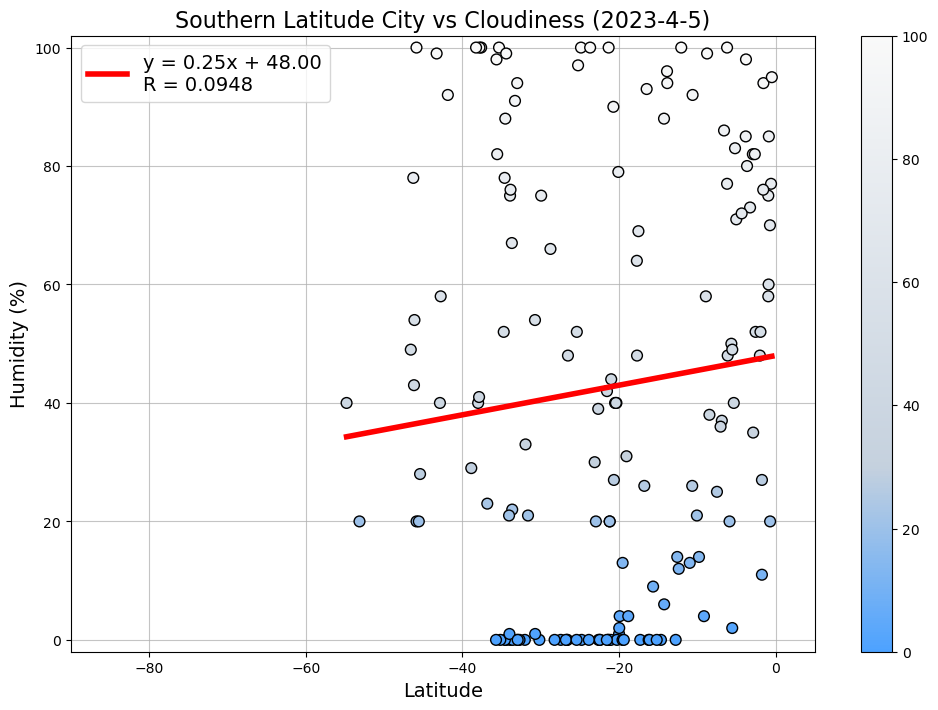

In [82]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                  cloudiness_cmap, 0, 100,
                  "Latitude", "Humidity (%)", "Southern Latitude City vs Cloudiness (2023-4-5)",
                  (-90, 5), (-2, 102))
ax = plot_linear_regression(ax, southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value = -0.0085


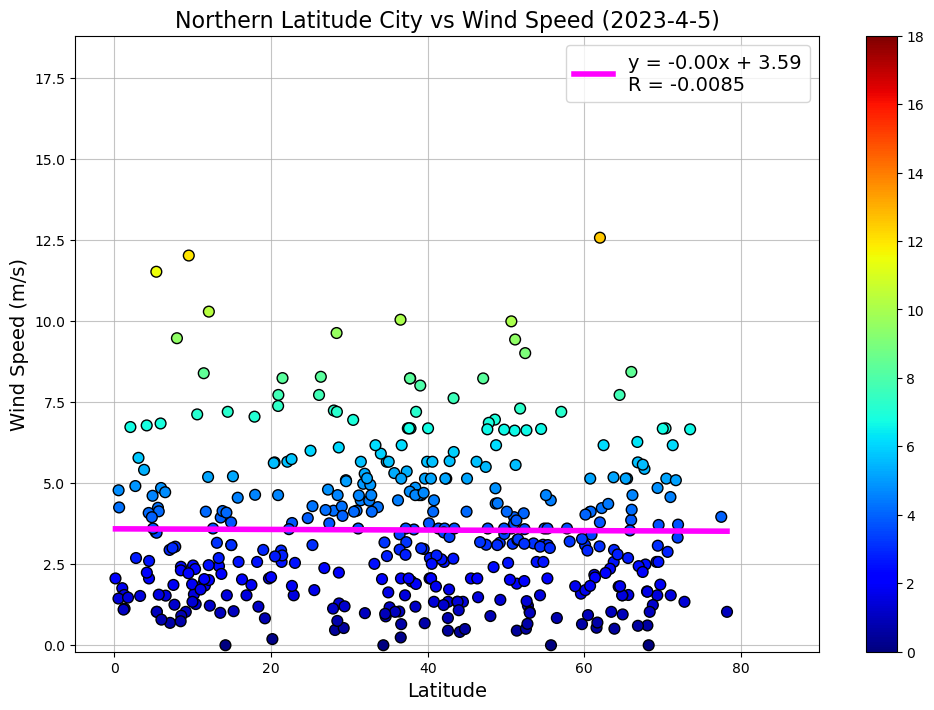

In [85]:
# Northern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                  'jet', 0, 18,
                  "Latitude", "Wind Speed (m/s)", "Northern Latitude City vs Wind Speed (2023-4-5)",
                  (-5, 90), (-0.2, 18.8))
ax = plot_linear_regression(ax, northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'magenta')
plt.show()

r-value = -0.1539


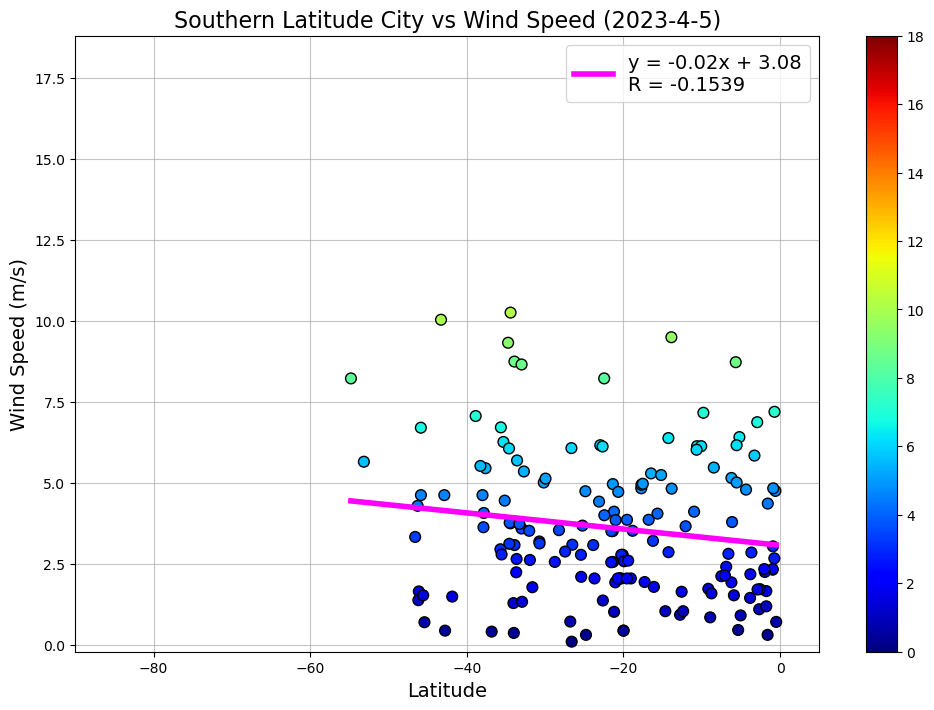

In [87]:
# Southern Hemisphere
fig, ax = plt.subplots(figsize=(12, 8))
ax = plot_scatter(fig, ax, southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                  'jet', 0, 18,
                  "Latitude", "Wind Speed (m/s)", "Southern Latitude City vs Wind Speed (2023-4-5)",
                  (-90, 5), (-0.2, 18.8))
ax = plot_linear_regression(ax, southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'magenta')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE